In [144]:
import sklearn.metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn. linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt

In [145]:
X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1, class_sep=0.4)
display(X, y)

array([[-0.86305361],
       [-1.4372011 ],
       [ 0.19592225],
       [-0.87164985],
       [ 0.00982831],
       [ 1.30282593],
       [ 0.16134434],
       [-0.9223264 ],
       [-0.10173176],
       [ 0.41006497],
       [ 0.27129997],
       [-0.71111212],
       [-2.98259876],
       [-0.09300387],
       [ 0.82285659],
       [ 0.16493473],
       [-0.40806382],
       [ 0.62136283],
       [ 0.76258897],
       [-0.11001122],
       [-1.26261842],
       [ 0.04513441],
       [ 0.50026937],
       [-0.6784482 ],
       [ 0.2182344 ]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [146]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([4.21884749e-17]), array([1.]))

In [147]:
model = LogisticRegression()
model.fit(X, y)

model_a = model.coef_[0][0]
model_b = model.intercept_[0]

print(f"Точность модели: {model.score(X, y)}")

y_pred = model.predict(X)

Точность модели: 0.8


In [148]:
def sigmoid(x):
    return 1 / (1 + np.exp (-x))

Text(0.5, 1.0, 'Сигмоида')

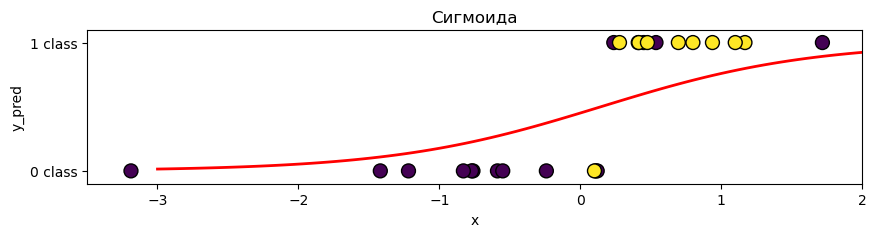

In [149]:
x = np.linspace (-3, 3, num=100)
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred, c=y, s=100, edgecolors='black')
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='r')
plt.ylabel('y_pred')
plt.xlabel('x')
plt.yticks (np.arange(0, 2), ['0 class', '1 class']) 
plt.ylim(-0.1, 1.1)
plt.xlim (-3.5, 2)
plt.title('Сигмоида')

Своя реализация логистической регрессии

In [150]:
# Добавление фиктивного признака
X = np.c_[np.ones_like(X), X]

In [151]:
def logloss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-16, 1 - 1e-16) 
    n = len(y_true)
    logloss_val = 0
    for i in range(n):
        logloss_val += y_true[i] * np.log(y_pred[i]) + (1 - y_true[i]) * np.log(1 - y_pred[i])
    return -logloss_val / n

In [152]:
print('Проверка корректности функции logloss')
print(f"Моё значение: {logloss(y, y_pred)}")
print(f"Значение sklearn: {sklearn.metrics.log_loss(y, y_pred)}")

Проверка корректности функции logloss
Моё значение: 7.35572498739363
Значение sklearn: 7.20873067782343


In [153]:
def gradient_logloss(y_true, x, w):
    y_pred = sigmoid(x @ w)
    return x.T @ (y_pred - y_true)

Итерация: 0
Logloss 0.7809352018720267
Accuracy 0.16
--------------------
Итерация: 80
Logloss 0.5979220700310762
Accuracy 0.84
--------------------
Итерация: 160
Logloss 0.5122672986031042
Accuracy 0.84
--------------------
Итерация: 240
Logloss 0.48223175784563155
Accuracy 0.84
--------------------


Text(0.5, 1.0, 'Сигмоида')

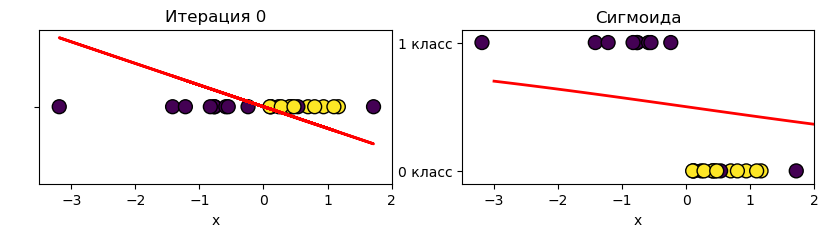

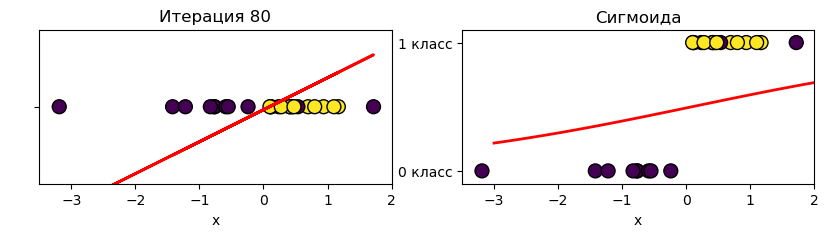

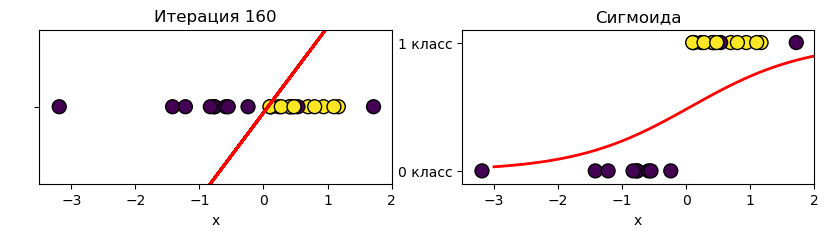

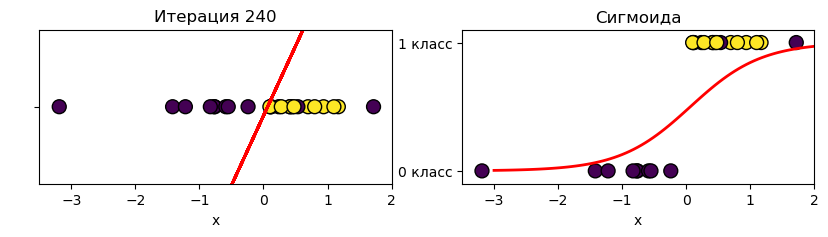

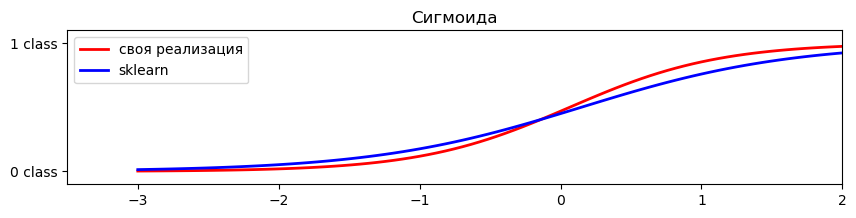

In [154]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(9)
w = np.random.randn(X.shape[1])
                     
# размер шага (learning rate)
learning_rate = 0.001
next_w = w
# количество итерация
n = 250
for i in range(n) :
    cur_w = next_w
    
    # движение в негативную сторону вычисляемого градиента
    next_w = cur_w - learning_rate * gradient_logloss(y, X, w)
    
    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_w - next_w) <= eps:
        break

    if i % 80 == 0:
        print (f"Итерация: {i}")
        y_proba = sigmoid(X @ next_w)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print('--------------------')

        model_grad = next_w @ X.T
        plt.figure(figsize=(10, 2))
        
        plt.subplot(121)
        plt.plot(X[:, 1], model_grad, linewidth=2, c='r', label='gradient')
        plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black' )
        plt.ylabel(' ')
        plt. xlabel('x')
        plt.yticks(np.arange(0, 1), [''])
        plt.title(f'Итерация {i}')
        plt.ylim(-1, 1)
        plt.xlim(-3.5, 2)
        
        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x), x]
        model_pred_x = next_w @ x_ones.T
        plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r')
        plt.scatter(X[:, 1], sigmoid(model_grad) >= 0.5, c=y, s=100, edgecolors='black') 
        plt.ylabel('')
        plt.xlabel('x')
        plt.yticks(np.arange(0, 2), ['0 класс', '1 класс'])
        plt.ylim(-0.1, 1.1) ;plt.xlim(-3.5, 2)
        plt.title('Сигмоида')

plt.figure(figsize=(10, 2))
x_ones = np.c_[np.ones_like(x), x]
model_pred_x = next_w @ x_ones.T
plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r', label='своя реализация')
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='b', label='sklearn')
plt.legend()
plt.yticks (np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1)
plt.xlim (-3.5, 2)
plt.title('Сигмоида')
        